In [2]:
import numpy as np
from sklearn import datasets, svm
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

/home/ashish/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 1. Support Vector Classification

## 1.1 Load the Iris dataset

In [10]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## 1.2 Use SVM with different kinds of kernels

In [11]:
def evaluate_on_test_data(model = None):
    predictions = model.predict(X_test)
    correct_classifications = 0
    for i in range(len(y_test)):
        if predictions[i] == y_test[i]:
            correct_classifications+=1
    accuracy = 100 * correct_classifications/len(y_test)
    return accuracy

In [12]:
kernels = ('linear', 'poly', 'rbf')
accuracies = []
for index, kernel in enumerate(kernels):
    model = svm.SVC(kernel = kernel)
    model.fit(X_train, y_train)
    acc = evaluate_on_test_data(model)
    accuracies.append(acc)
    print("{} % accuracy obtained with kernel = {}".format(acc, kernel))

84.21052631578948 % accuracy obtained with kernel = linear
81.57894736842105 % accuracy obtained with kernel = poly
84.21052631578948 % accuracy obtained with kernel = rbf


## 1.3 Visualize the decision boundaries

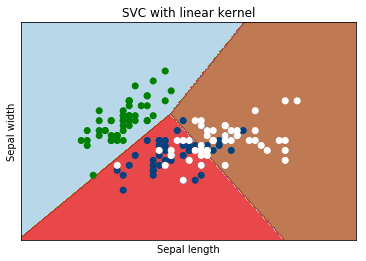

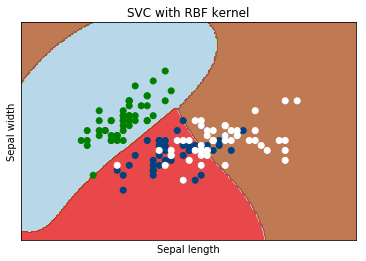

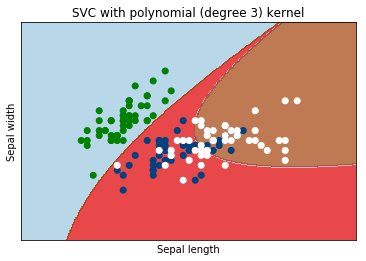

In [17]:
#Train SVMs with different kernels
svc = svm.SVC(kernel = 'linear').fit(X_train, y_train)
rbf_svc = svm.SVC(kernel = 'rbf', gamma = 0.7).fit(X_train, y_train)
poly_svc = svm.SVC(kernel = 'poly', degree = 3).fit(X_train, y_train)

#Create a mesh to plot in
h = 0.02 #step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

#Define title for the plots
titles = ['SVC with linear kernel', 'SVC with RBF kernel', 'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    #Plot the decision boundary
    plt.figure(i)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    #Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.8)
    
    #Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.ocean)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

# 2. Support Vector Regression

## 2.1 Load data from Boston dataset

In [18]:
boston = datasets.load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## 2.2 Use Support Vector Machine with different kinds of kernels

In [19]:
def evaluate_on_test_data(model=None):
    predictions = model.predict(X_test)
    sum_of_squared_error = 0
    for i in range(len(y_test)):
        err = (predictions[i] - y_test[i]) ** 2
        sum_of_squared_error += err
    mean_squared_error = sum_of_squared_error/len(y_test)
    RMSE = np.sqrt(mean_squared_error)
    return RMSE


In [22]:
kernels = ('linear', 'rbf')
RMSE_vec = []
for index, kernel in enumerate(kernels):
    model = svm.SVR(kernel = kernel)
    model.fit(X_train, y_train)
    RMSE = evaluate_on_test_data(model)
    RMSE_vec.append(RMSE)
    print("RMSE={} obtained with kernel = {}".format(RMSE, kernel))

RMSE=5.305100811348274 obtained with kernel = linear
RMSE=8.280264820347222 obtained with kernel = rbf
